# A comparison between the degree of concentration of last names between Japan and Taiwan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jp = pd.read_csv('./utf_8_japan.csv')
print(jp.shape)
print(jp.head)

(25078, 3)
<bound method NDFrame.head of       sei    rank  number
0      佐藤      1位  481980
1      鈴木      2位  426804
2      高橋      3位  353911
3      田中      4位  334073
4      渡辺      5位  276257
...    ..     ...     ...
25073  根口  24706位      40
25074  根〆  24706位      40
25075  今春  24706位      40
25076  此木  24706位      40
25077  黒肱  24706位      40

[25078 rows x 3 columns]>


## As usual, first we import the files and make them into the same format

In [2]:
jp_format = jp.drop('rank',axis=1)

In [3]:
jp_format['ranking']=range(1,jp_format.shape[0]+1)
jp_format = jp_format.rename(columns={"sei": "lastname", "number": "population"})
jp_format=jp_format.reindex(columns=['ranking','lastname','population'])
jp_format

,ranking,lastname,population
0,1,佐藤,481980
1,2,鈴木,426804
2,3,高橋,353911
3,4,田中,334073
4,5,渡辺,276257
...,...,...,...
25073,25074,根口,40
25074,25075,根〆,40
25075,25076,今春,40
25076,25077,此木,40


In [4]:
tw = pd.read_csv('./taiwan.csv')
print(tw.shape)

(8193, 5)


In [5]:
tw=tw.drop(['statistic_yyy'],axis=1)
tw

,ranking,lastname,age,population
0,1,陳,0~14歲,316689
1,1,陳,15~64歲,1822159
2,1,陳,65歲以上,480146
3,2,林,0~14歲,239450
4,2,林,15~64歲,1355816
...,...,...,...,...
8188,2730,󽄷,15~64歲,0
8189,2730,󽄷,65歲以上,1
8190,2731,󽆘,0~14歲,0
8191,2731,󽆘,15~64歲,0


In [6]:
tw_format = tw.groupby(['ranking','lastname']).agg(sum).reset_index().drop(['age'],axis=1)
tw_format

,ranking,lastname,population
0,1,陳,2618994
1,2,林,1947520
2,3,黃,1402808
3,4,張,1239880
4,5,李,1199920
...,...,...,...
2726,2727,󹝞,1
2727,2728,󼮮原,1
2728,2729,󼸞,1
2729,2730,󽄷,1


## After that, we making them into numpy arrays and calculate the hhi indexes of them

In [7]:
t = tw_format.to_numpy()
j = jp_format.to_numpy()

In [8]:
t

array([[1, '陳', 2618994],
       [2, '林', 1947520],
       [3, '黃', 1402808],
       ...,
       [2729, '\U000fce1e', 1],
       [2730, '\U000fd137', 1],
       [2731, '\U000fd198', 1]], dtype=object)

In [9]:
j

array([[1, '佐藤', 481980],
       [2, '鈴木', 426804],
       [3, '高橋', 353911],
       ...,
       [25076, '今春', 40],
       [25077, '此木', 40],
       [25078, '黒肱', 40]], dtype=object)

In [10]:
def hhi(data):
    temp = data*1
    p_sum = sum(temp[:,2])
    temp[:,2] /= p_sum
    return sum(temp[:,2]**2)

def get_percent(data):
    temp = data*1
    p_sum = sum(temp[:,2])
    temp[:,2] /= p_sum
    return temp


In [11]:
p_j = get_percent(j)
p_t = get_percent(t)
p_j_1k = get_percent(j[:1000])
p_t_1k = get_percent(t[:1000])


print(f'The hhi index of Japan: {hhi(j[:1000])}')
print(f'The hhi index of Taiwan: {hhi(t[:1000])}')

The hhi index of Japan: 0.004079500854915622
The hhi index of Taiwan: 0.03864669496413481


## As you can see, Taiwan has a higher level of concentration of last names
### The hhi index of Japan: 0.004079500854915622
### The hhi index of Taiwan: 0.03864669496413481

## Now we tried to draw the individual percents of last names in on a log scale in a decending order
### Japan being red and Taiwan being blue curves

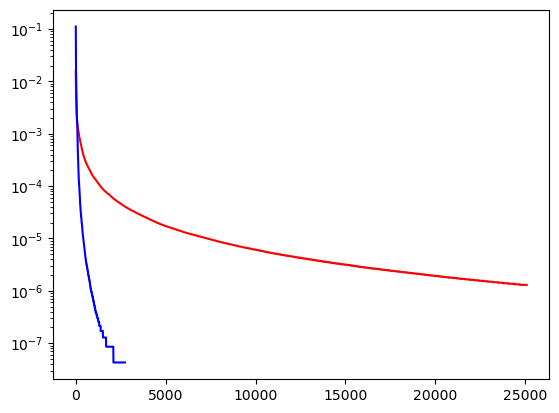

In [12]:

plt.plot(p_j[:,0],p_j[:,2],color='r')
plt.plot(p_t[:,0],p_t[:,2],color='b')
plt.yscale('log')

## This is a bit no easy to read, so lets just take the first 1000 entries of each sets

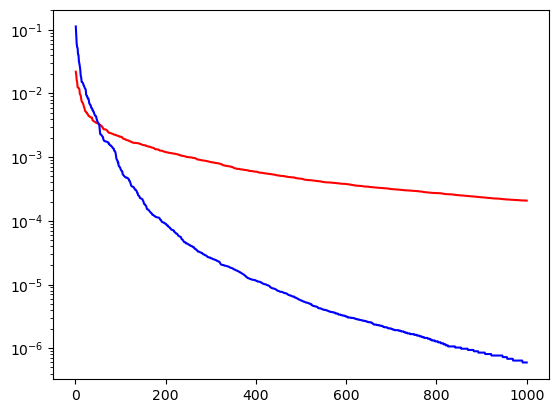

In [13]:

plt.plot(p_j_1k[:1000,0],p_j_1k[:1000,2],color='r')
plt.plot(p_t_1k[:1000,0],p_t_1k[:1000,2],color='b')
plt.yscale('log')

## Which clearly shows Taiwan does have a higher level of concentration

In [14]:
def acc(data):
    acc = 0
    rev_data = data[::-1]
    acc_list = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        acc += rev_data[i]
        acc_list[i] = acc
    return acc_list

## Now we tried to calculate the gini cofficient of the two data sets
### Since this is gini cofficient, we also include a gray line for comparison

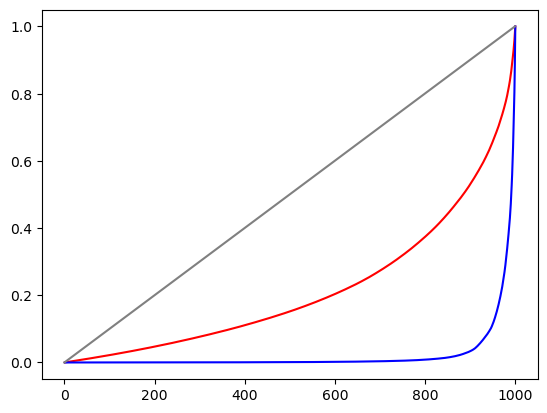

In [15]:
plt.plot(p_j_1k[:,0],acc(p_j_1k[:,2]),color='r')
plt.plot(p_t_1k[:,0],acc(p_t_1k[:,2]),color='b')
plt.plot(np.linspace(0,999,1000),np.linspace(0,1,1000),color='gray')

### examples taken from https://github.com/oliviaguest/gini

In [16]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq: http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    # from: http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array) #values cannot be negative
    array += 0.0000001 #values cannot be 0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) #index per array element
    n = array.shape[0]#number of array elements
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array))) #Gini coefficient

In [17]:
print(f'The gini index of Japan: {gini(j[:,2])}')
print(f'The gini index of Taiwan: {gini(t[:,2])}')

The gini index of Japan: 0.8707163603956866
The gini index of Taiwan: 0.9833302879456073


## As you can see again, Taiwan really does have higher level of concentration in last names
### The gini index of Japan: 0.8707163603956866
### The gini index of Taiwan: 0.9833302879456073